In [1]:
#@title Version 1 Jan_5_DLmodel1 <br>vocab size = 10000 , padding = 1000 <br> testing accuracy around 70% 

### First Model

## first dataset : final_dataset_1.csv

### Connect to drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)


In [3]:
ls

content/  drive/               sample_data/           tokenizer_Jan5_v2.pickle
dataset/  Jan_5_DL_model1.zip  tokenizer_Jan5.pickle


In [4]:
!mkdir dataset
!ls

mkdir: cannot create directory ‘dataset’: File exists
content  drive		      sample_data	     tokenizer_Jan5_v2.pickle
dataset  Jan_5_DL_model1.zip  tokenizer_Jan5.pickle


### Copy Dataset from drive

In [5]:
!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_1.csv' /content/dataset/
! echo copied final_dataset_1

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_2.csv' /content/dataset/
! echo copied final_dataset_2


copied final_dataset_1
copied final_dataset_2


#### Reading dataset

In [6]:
data = pd.read_csv('/content/dataset/final_dataset_1.csv')
data

,Language,Source
0,bash,"bash\nalias tail_ls=""ls -l $1 | tail""\n\ntail_..."
1,bash,"ERR_COUNT=`echo $VAR_WITH_TEXT | grep ""ERROR t..."
2,bash,SET JARS=^\n./lib/apache-mime4j-0.6.jar;^\n./l...
3,bash,2010-02-20 21:01 1458414588 s3://file1.tgz.0...
4,bash,pkill /?\n\n[ws@RHDev ~]# pkill $(ps aux | gre...
...,...,...
29995,swift,/* Scale and crop image */\nfunc imageByScalin...
29996,swift,import UIKit\nimport MapKit\n\nclass ViewContr...
29997,swift,html\nUIWebView\nParseConfig\nhtml\nParseConfi...
29998,swift,var array1: [AnyObject!] = []\n\n var key...


### Describing Dataset part 1

Text(0.5, 1.0, 'Dataset')

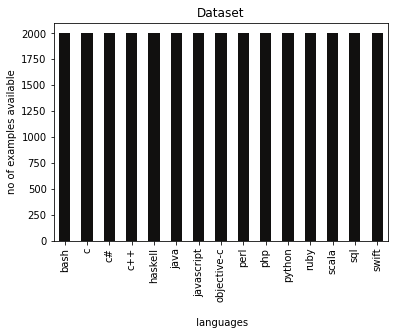

In [7]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

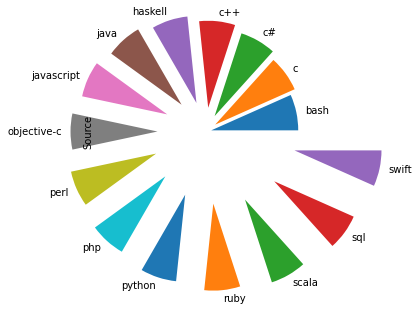

In [8]:
data.groupby('Language')['Source'].count().plot.pie(explode=[0.065+(0.0699*i) for i in range(15)] )

### Since dataset is not clean it needs preprocessing

### PREPROCESSING OF DATASET USING REGULAR EXPRESSION AND NLTK

In [9]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
.....done


In [10]:
import re
stopwords_list = stopwords.words('english')
print(len(stopwords_list))

179


In [11]:
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))

185


In [12]:
stopwords_list.extend(['bottom','start','end','price','location','fix','here','Start','Over','End'])
print(len(stopwords_list))


195


In [13]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

# trying clean_code2
def clean_code2(text):
  text = expression1(text)
  if len(text)>5001 or len(text)<8:
    return ''
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()
  if len(tokens_without_stopwords)>500:
    return ''
  else:
    return ' '.join(tokens_without_stopwords)

def clean_code3(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word.lower() in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


#### now rejecting examples with length > 5000

In [15]:
def return_len(dataframe):
  sentences = dataframe.Source.astype('U')
#     print(len(sentences))
#     print(type(sentences))
  lengths = np.asarray([len(sentence) for sentence in sentences ])
  print('--- min : {} , max : {} , average : {} ---'.format(np.min(lengths),np.max(lengths),np.mean(lengths)))
  return lengths

langs = [i for i in data.Language.unique()]
langs.sort()
langs

['bash',
 'c',
 'c#',
 'c++',
 'haskell',
 'java',
 'javascript',
 'objective-c',
 'perl',
 'php',
 'python',
 'ruby',
 'scala',
 'sql',
 'swift']

In [16]:
%%time
detailed_lengths = []
for i in langs:
  print(' - ',i,' -')
  detailed_lengths.append(return_len(data[data.Language==i]))
print(len(detailed_lengths))

 -  bash  -
--- min : 10 , max : 24521 , average : 325.3675 ---
 -  c  -
--- min : 10 , max : 24256 , average : 558.392 ---
 -  c#  -
--- min : 10 , max : 16970 , average : 583.482 ---
 -  c++  -
--- min : 10 , max : 28002 , average : 598.3775 ---
 -  haskell  -
--- min : 10 , max : 12876 , average : 563.049 ---
 -  java  -
--- min : 10 , max : 27587 , average : 717.7025 ---
 -  javascript  -
--- min : 10 , max : 32366 , average : 520.9325 ---
 -  objective-c  -
--- min : 10 , max : 22865 , average : 646.5355 ---
 -  perl  -
--- min : 10 , max : 14899 , average : 512.841 ---
 -  php  -
--- min : 10 , max : 19257 , average : 497.8405 ---
 -  python  -
--- min : 10 , max : 16065 , average : 471.409 ---
 -  ruby  -
--- min : 10 , max : 19354 , average : 462.915 ---
 -  scala  -
--- min : 10 , max : 14524 , average : 527.3085 ---
 -  sql  -
--- min : 10 , max : 28299 , average : 531.66 ---
 -  swift  -
--- min : 10 , max : 17767 , average : 778.781 ---
15
CPU times: user 62.6 ms, sys: 11.1

In [19]:
%%time

line_7210 = data.iloc[1001]['Source']
cleaned_7210 =  clean_code(line_7210)
cleaned2_7210 =  clean_code2(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))
print('-'*60,'\n\n')
print(cleaned2_7210,'\n ->',len(cleaned2_7210))

$(__git_ps1 "[%s]")
pwd
~/.bash_profile
# File: ~/.bash_profile

# source ~/.profile, if available
if [[ -r ~/.profile ]]; then
  . ~/.profile
fi

# start agent and set environment variables, if needed
agent_started=0
if ! env | grep -q SSH_AGENT_PID >/dev/null; then
  echo "Starting ssh agent"
  eval $(ssh-agent -s)
  agent_started=1
fi

# ssh become a function, adding identity to agent when needed
ssh() {
  if ! ssh-add -l >/dev/null 2>-; then
    ssh-add ~/.ssh/id_dsa
  fi
  /usr/bin/ssh "$@"
}
export -f ssh

# another example: git
git() {
  if ! ssh-add -l >/dev/null 2>-; then
    ssh-add ~/.ssh/id_dsa
  fi
  /usr/bin/git "$@"
}
export -f git

ssh
ssh()
 
 -> 666
------------------------------------------------------------ 


$ ( __git_ps `` [ % ] `` ) pwd .bash_profile File : .bash_profile source .profile , available [ [ .profile ] ] ; .profile fi agent set environment variables , needed agent_started env grep SSH_AGENT_PID dev null ; echo `` Starting ssh agent `` eval $ ( ssh age

### Cleaning dataset with clean_code2 this time ( sources >1000 removed )

In [20]:
%%time

dataset_refined = data.copy()
print('->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code2)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_1_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')

->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 22.3 s, sys: 53.3 ms, total: 22.4 s
Wall time: 22.4 s


In [21]:
%%time

df = pd.read_csv('/content/dataset/cleaned_data_1_v2.csv')

CPU times: user 101 ms, sys: 18 ms, total: 119 ms
Wall time: 122 ms


In [22]:
df

,Language,Source
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...
3,bash,file .tgz . < br > file .tgz . < br > file .tg...
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...
...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...
29996,swift,import UIKit import MapKit class ViewControlle...
29997,swift,html UIWebView ParseConfig html ParseConfig UR...
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...


## dropping NaN values from dataframe

In [23]:
len(df)

30000

In [24]:
cleaned_df = df.dropna().copy()
len(cleaned_df)

29252

In [25]:
cleaned_df

,Language,Source
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...
3,bash,file .tgz . < br > file .tgz . < br > file .tg...
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...
...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...
29996,swift,import UIKit import MapKit class ViewControlle...
29997,swift,html UIWebView ParseConfig html ParseConfig UR...
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...


### Describing cleaned dataset

In [26]:
%%time
detailed_lengths_cleaned = []
for i in langs:
  print(' - ',i,' -')
  detailed_lengths_cleaned.append(return_len(cleaned_df[cleaned_df.Language==i]))
print(len(detailed_lengths_cleaned))

 -  bash  -
--- min : 4 , max : 3464 , average : 223.99695585996955 ---
 -  c  -
--- min : 3 , max : 2824 , average : 350.7204356846473 ---
 -  c#  -
--- min : 5 , max : 3544 , average : 413.37976614133197 ---
 -  c++  -
--- min : 3 , max : 3288 , average : 365.1804550155119 ---
 -  haskell  -
--- min : 2 , max : 3002 , average : 370.41074168797957 ---
 -  java  -
--- min : 6 , max : 4251 , average : 426.69979296066253 ---
 -  javascript  -
--- min : 7 , max : 2712 , average : 356.8676923076923 ---
 -  objective-c  -
--- min : 9 , max : 3513 , average : 481.68286445012785 ---
 -  perl  -
--- min : 2 , max : 4432 , average : 340.64470954356847 ---
 -  php  -
--- min : 3 , max : 2839 , average : 336.1779045643153 ---
 -  python  -
--- min : 4 , max : 3412 , average : 349.54285714285714 ---
 -  ruby  -
--- min : 3 , max : 3729 , average : 322.2933060807358 ---
 -  scala  -
--- min : 4 , max : 3885 , average : 417.734756097561 ---
 -  sql  -
--- min : 5 , max : 4660 , average : 305.4461459

In [27]:
%%time

cleaned_df["lang_id"] = cleaned_df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = cleaned_df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
# lang_to_id = dict(lang_id_df.values)
# id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',cleaned_df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 10.7 ms, sys: 994 µs, total: 11.7 ms
Wall time: 11.1 ms


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


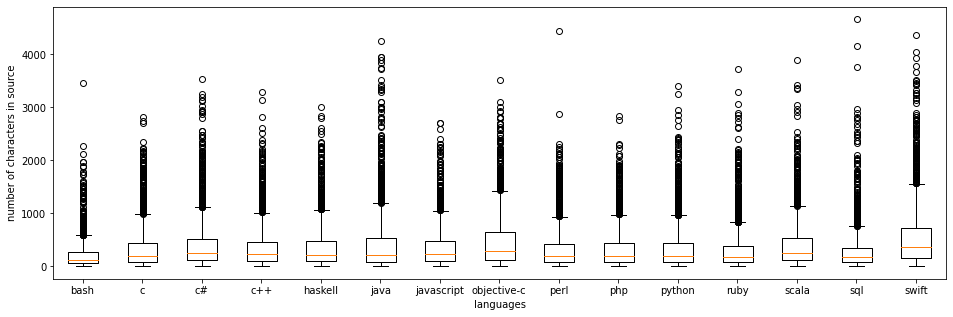

In [28]:
fig=plt.figure(1,figsize=(16,5))
ax=fig.add_subplot(111)
bp=ax.boxplot(detailed_lengths_cleaned)
# plt.xticks(ticks=langs)
plt.xticks([0.992+i for i in range(15)], langs)
plt.xlabel('languages')
plt.ylabel('number of characters in source')
fig.show()

In [29]:
cleaned_df

,Language,Source,lang_id
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc,0
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...,0
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...,0
3,bash,file .tgz . < br > file .tgz . < br > file .tg...,0
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...,0
...,...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...,14
29996,swift,import UIKit import MapKit class ViewControlle...,14
29997,swift,html UIWebView ParseConfig html ParseConfig UR...,14
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...,14


### Training test split

In [30]:
mask = np.random.rand(len(cleaned_df)) > 0.19
print('mask created',type(mask))

mask created <class 'numpy.ndarray'>


In [31]:
data_1 = cleaned_df[mask]
data_2 = cleaned_df[~mask]
print('created two halves')
print('1st -->',len(data_1) , '\n 2nd-->', len(data_2))

created two halves
1st --> 23697 
 2nd--> 5555


Text(0.5, 1.0, 'Dataset_part_1 - FOR TRAINING')

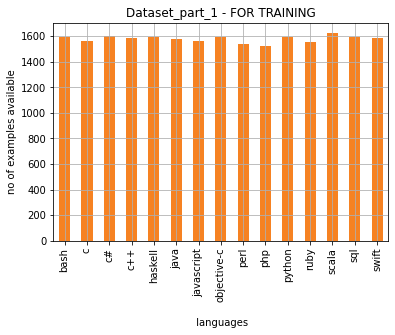

In [32]:
data_1.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f68222')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_1 - FOR TRAINING')

Text(0.5, 1.0, 'Dataset_part_2 - FOR TESTING')

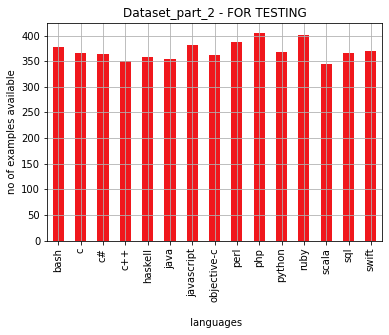

In [33]:
data_2.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f0171c')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_2 - FOR TESTING')

In [34]:
import tensorflow as tf

### Tokenizing

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:

vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"


In [37]:

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
print('Tokenizer created')


Tokenizer created


In [38]:
print('fitting on training sentences\n.\n.')

tokenizer.fit_on_texts(data_1['Source'].values.astype('U'))

print('.\n.\n.\nfitted on training sentences')

fitting on training sentences
.
.
.
.
.
fitted on training sentences


In [39]:
word_index = tokenizer.word_index
print('len of word index',len(word_index))

len of word index 70493


In [40]:
%%time

import pickle

# saving
with open('tokenizer_Jan5_v2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('saved')

saved
CPU times: user 56.4 ms, sys: 6.05 ms, total: 62.4 ms
Wall time: 63.3 ms


## copy to drive

In [41]:
!cp '/content/tokenizer_Jan5_v2.pickle' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo copied

copied


#### Convert training sentences to sequences

In [42]:
max_length = 1000
trunc_type='post'

In [67]:
X_train = None
print(X_train)

None


In [68]:
%%time
print('converting training data')

# X_train = tokenizer.texts_to_matrix(data_1['Source'].values.astype('U'),mode='tfidf')
# print('done',type(X_train))

X_train = tokenizer.texts_to_sequences(data_1['Source'].values.astype('U'))
print(' .... converted text to sequences' , type(X_train),'\n ')
print('-'*70)

X_train_padded = pad_sequences(X_train,maxlen=max_length, truncating=trunc_type)
print('sequence padded')
print(type(X_train_padded),'\n padded to ',X_train_padded.shape)

converting training data
 .... converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
sequence padded
<class 'numpy.ndarray'> 
 padded to  (23697, 1000)
CPU times: user 1.48 s, sys: 75.4 ms, total: 1.55 s
Wall time: 1.55 s


### Converting testing sentences to sequenes

In [69]:
X_test = None
print(X_test)

None


In [70]:
# %%time
# print('converting testing data')
# X_test = tokenizer.texts_to_matrix(data_2['Source'].values.astype('U'),mode='tfidf')
# print('done',type(X_test),X_test.shape)
# X_test_padded = pad_sequences(X_test,maxlen=max_length, truncating=trunc_type)
# print('sequence padded')
# print(type(X_test_padded),'\n padded to ',X_test_padded.shape)

In [71]:
%%time

X_test = tokenizer.texts_to_sequences(data_2['Source'].values.astype('U'))
print('..converted text to sequences' , type(X_test),'\n ')
print('-'*70)
X_test_padded = pad_sequences(X_test,maxlen=max_length, truncating=trunc_type)
print('sequence padded')
print(type(X_test_padded),'\n padded to ',X_test_padded.shape)

..converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
sequence padded
<class 'numpy.ndarray'> 
 padded to  (5555, 1000)
CPU times: user 312 ms, sys: 5.84 ms, total: 318 ms
Wall time: 318 ms


## Preparing labels

### Training labels

In [48]:
Y_train = pd.get_dummies(data_1['Language'].values.astype('U'))
print('and Y : ',type(Y_train))
y_train = np.asarray(Y_train)
print(X_train.shape , y_train.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(23697, 10000) (23697, 15)


### Testing labels

In [49]:
Y_test = pd.get_dummies(data_2['Language'].values.astype('U'))
print('and Y : ',type(Y_test))
y_test = np.asarray(Y_test)
print(X_test.shape , y_test.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(5555, 10000) (5555, 15)


### Creating the model

In [89]:
my_model2 = tf.keras.models.Sequential()
print('model created now add layers')

model created now add layers


In [90]:
# my_model.add(tf.keras.layers.Input(input_shape=2215))
my_model2.add(tf.keras.layers.InputLayer(input_shape=max_length,dtype=tf.int32))
print('\n --> added input layer with max sequence max_features = ',max_length)
my_model2.summary()
# print('added input layer')


 --> added input layer with max sequence max_features =  1000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [91]:
t = len(tokenizer.word_index)
t , t**(0.25)

(70493, 16.29432965350866)

### embedding dim 32 this time

In [92]:
embed_dim = 32

In [93]:
my_model2.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = max_length))

# my_model2.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = inputShape))

print('\n-->added embedding layer with vocab size = ',vocab_size,'embed dim = ',embed_dim)

my_model2.summary()


-->added embedding layer with vocab size =  10000 embed dim =  32
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


### 1 convolution layer 

In [94]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model2.add(tf.keras.layers.Conv1D(128 , 5, padding='valid',kernel_initializer='random_normal'))
print('.\n.\n.\n-->added conv1d layer with 128 filters size = 5, valid padding  ,random_normal initializer')
my_model2.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model2.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model2.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model2.summary()

.
.
.
-->added conv1d layer with 128 filters size = 5, valid padding  ,random_normal initializer
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 199, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 199, 128)          0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
_____________

In [95]:
my_model2.add(tf.keras.layers.GlobalAveragePooling1D())
print('added global average poolinglayer')
my_model2.summary()

added global average poolinglayer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 199, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
____________

In [96]:
my_model2.add(tf.keras.layers.Dropout(0.7))
print('.\n.\n.\n--> added a 0.7 dropout layer')
my_model2.add(tf.keras.layers.Dense(64))
print('.\n.\n.\n--> added a dense layer ')
my_model2.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model2.add(tf.keras.layers.Activation('tanh'))
print('added tanh activation layer')
my_model2.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model2.summary()

.
.
.
--> added a 0.7 dropout layer
.
.
.
--> added a dense layer 
added batch norm layer
added tanh activation layer
.
.
.
--> flatten layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 199, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)    

In [59]:
# my_model2.add(tf.keras.layers.Dense(32))
# print('.\n.\n.\n--> added another dense layer with 32 units')
# my_model2.add(tf.keras.layers.BatchNormalization())
# print('added batch norm layer')
# my_model2.add(tf.keras.layers.Activation('relu'))
# print('added relu activation layer')
# my_model2.add(tf.keras.layers.Flatten())
# print('.\n.\n.\n--> flatten layer')
# my_model2.summary()

In [97]:
num_classes = 15


my_model2.add(tf.keras.layers.Dense(num_classes))
print('--> dense layer of size =  ',num_classes)
my_model2.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model2.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model2.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model2.add(tf.keras.layers.Activation('softmax'))
print('added final softmax activation layer')
print('-'*75,'\n\n')
my_model2.summary()

--> dense layer of size =   15
added batch norm layer
added sigmoid activation layer
.
.
.
--> flatten layer
added final softmax activation layer
--------------------------------------------------------------------------- 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 199, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 199, 128)          0         
___________________________

### Model created

In [98]:
my_model2.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy', metrics=['accuracy'])
print('--->compiled with learning rate : 0.0001 -')

--->compiled with learning rate : 0.0001 -


### model compiled

### Now training the model

### using k fold cross validation

In [99]:
from sklearn.model_selection import KFold

# n_fold = 2
# n_fold = 3 
# n_fold = 5
n_fold = 10

k_fold = KFold(n_fold,shuffle=True,random_state=42)

In [100]:
k_fold

KFold(n_splits=10, random_state=42, shuffle=True)

In [101]:
%%time

scores = []
histories = []

print('...... fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train_padded):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train_padded[train_iX] , y_train[train_iX] , X_train_padded[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = my_model2.fit(x_itrain,y_itrain,batch_size=64,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = my_model2.evaluate(X_test_padded , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores.append(acc)
  histories.append(history)

print('done')

...... fitting the model

Epoch 1/10
334/334 [==============================] - 7s 16ms/step - loss: 2.8812 - accuracy: 0.0670 - val_loss: 2.7057 - val_accuracy: 0.0781
Epoch 2/10
334/334 [==============================] - 5s 16ms/step - loss: 2.7576 - accuracy: 0.0887 - val_loss: 2.7271 - val_accuracy: 0.0671
Epoch 3/10
334/334 [==============================] - 5s 16ms/step - loss: 2.6543 - accuracy: 0.1320 - val_loss: 3.0865 - val_accuracy: 0.0629
Epoch 4/10
334/334 [==============================] - 5s 16ms/step - loss: 2.3308 - accuracy: 0.2807 - val_loss: 2.8059 - val_accuracy: 0.0848
Epoch 5/10
334/334 [==============================] - 5s 16ms/step - loss: 2.0658 - accuracy: 0.4044 - val_loss: 3.5887 - val_accuracy: 0.0835
Epoch 6/10
334/334 [==============================] - 5s 16ms/step - loss: 1.9246 - accuracy: 0.4720 - val_loss: 2.4434 - val_accuracy: 0.2738
Epoch 7/10
334/334 [==============================] - 5s 15ms/step - loss: 1.8223 - accuracy: 0.5067 - val_loss: 2.1

## HIGH OVERFITTING POOR PERFORMANCE

### save model for later use

In [104]:
print('saving model...')
my_model2.save('content/Jan_5_DL_model1')
print('saved')

saving model...
INFO:tensorflow:Assets written to: content/Jan_5_DL_model1/assets
saved


Text(0.5, 0.98, 'TESTING ACCURACY')

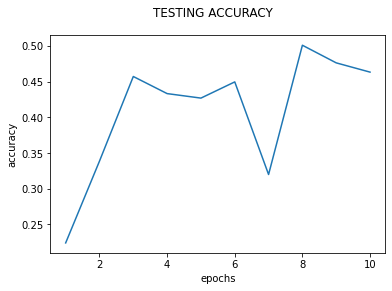

In [108]:
plt.plot([i for i in range(1,len(scores)+1)] , scores)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TESTING ACCURACY')

In [109]:
!zip -r /content/Jan_5_DL_model1.zip /content/content/Jan_5_DL_model1

  adding: content/content/Jan_5_DL_model1/ (stored 0%)
  adding: content/content/Jan_5_DL_model1/saved_model.pb (deflated 89%)
  adding: content/content/Jan_5_DL_model1/assets/ (stored 0%)
  adding: content/content/Jan_5_DL_model1/variables/ (stored 0%)
  adding: content/content/Jan_5_DL_model1/variables/variables.index (deflated 68%)
  adding: content/content/Jan_5_DL_model1/variables/variables.data-00000-of-00001 (deflated 7%)


In [110]:
!cp '/content/Jan_5_DL_model1.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo done

done


In [112]:
hist1 = histories[0]

In [121]:
acc = []
for i in range(10):
  acc.extend(histories[i].history['accuracy'])
print(len(acc))

100


Text(0.5, 0.98, 'TRAINING ACCURACY')

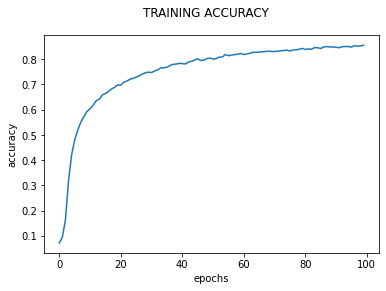

In [124]:
plt.plot([i for i in range(0,len(acc))] ,acc,label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TRAINING ACCURACY')

### Confusion Matrix

In [125]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Testing Data

In [126]:
%%time
predictions_1 = my_model2.predict(X_test_padded)
print('done predicting on test data')
print(type(predictions_1))


done predicting on test data
<class 'numpy.ndarray'>
CPU times: user 518 ms, sys: 36.9 ms, total: 555 ms
Wall time: 494 ms


In [127]:
predictions_1.shape , y_test.shape

((5555, 15), (5555, 15))

In [128]:
first_preds = np.argmax(predictions_1,axis=1)
first_preds.shape

(5555,)

In [129]:
actual_pred = np.argmax(y_test,axis=1)
actual_pred.shape # use these argmax values for confusion matrix

(5555,)

In [130]:
print('\n','-'*50,'\n')
cnf_matrix1 = confusion_matrix(actual_pred, first_preds)
print(cnf_matrix1)


 -------------------------------------------------- 

[[264   2   1   2   0   0   1   0   1   0   2 101   3   0   0]
 [ 10 138   8  18   0   0   1   2   0   3   0 180   5   0   1]
 [  1   1 216   1   0   0   1   0   0   0   1 136   4   3   0]
 [  1  11  24 167   0   0   0   0   1   0   0 138   8   0   0]
 [  5   0   4   0 180   0   1   1   0   1   0 145  19   0   2]
 [  5   1  77   1   1  42   2   1   0   0   0 158  66   0   1]
 [  5   0   5   0   0   0 159   0   1   3   0 203   6   0   0]
 [  1   2   5   0   0   0   1 201   0   0   0 149   0   0   3]
 [ 32   3   3   2   1   0   1   1 135   0   3 202   3   2   0]
 [ 12   0   3   1   0   0   5   0   0  61   1 315   4   2   0]
 [  4   2   3   0   0   1   2   0   0   0 116 235   5   0   0]
 [  2   0   4   0   0   0   1   0   1   0   0 391   2   0   0]
 [  0   0   4   2   1   0   1   0   0   1   1  64 271   0   0]
 [  4   0  29   0   0   0   0   1   0   1   1 286   5  39   0]
 [  2   0   3   0   0   0   1   5   0   1   1 153  10   0 193]]

In [131]:
# class_names = df['Language'].unique()
# class_names

In [132]:
import seaborn as sns

### Better confusion martrix display
##### source : https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [133]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

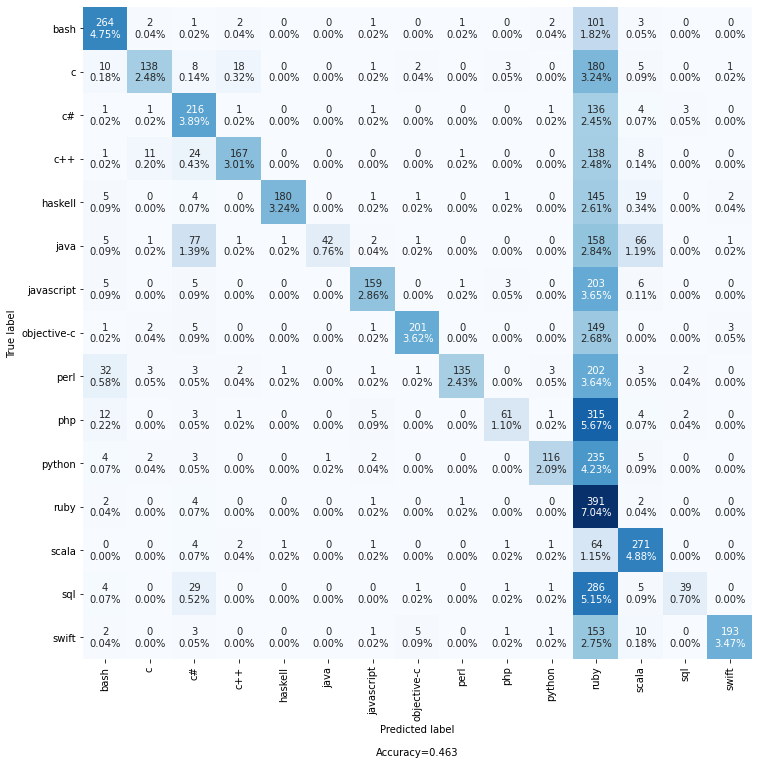

In [134]:
# make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False )
make_confusion_matrix(cnf_matrix1, figsize=(12,12), cbar=False ,categories=langs)


### Precision Recall and F1 Score

In [135]:
from sklearn.metrics import precision_recall_fscore_support as score


In [148]:
def print_metrics(predictions):
  precision , recall , fscore , support = score( actual_pred, predictions)
  print('-'*80)
  print('{:10}\t | {:7}\t |  {:12}|\t{}'.format('   Language','  Precision',' Recall',' F1 Measure'))
  print('-'*80)
  for i in range(len(langs)):
    
    result = '{:10}\t |{:13.5}\t |{:10.5}\t|\t{:10.5}'.format(str('   '+langs[i]),precision[i],recall[i],fscore[i])
    print(result,end='\n')
    print('-'*80)


In [149]:
print_metrics(first_preds)

--------------------------------------------------------------------------------
   Language	 |   Precision	 |   Recall     |	 F1 Measure
--------------------------------------------------------------------------------
   bash   	 |      0.75862	 |   0.70027	|	   0.72828
--------------------------------------------------------------------------------
   c      	 |       0.8625	 |   0.37705	|	   0.52471
--------------------------------------------------------------------------------
   c#     	 |      0.55527	 |   0.59341	|	   0.57371
--------------------------------------------------------------------------------
   c++    	 |      0.86082	 |   0.47714	|	   0.61397
--------------------------------------------------------------------------------
   haskell	 |      0.98361	 |   0.50279	|	   0.66543
--------------------------------------------------------------------------------
   java   	 |      0.97674	 |   0.11831	|	   0.21106
----------------------------------------------------------

### creating another for just testing something

In [ ]:
my_model5 = tf.keras.models.Sequential()
print('model created now add layers')

model created now add layers


In [ ]:
# my_model.add(tf.keras.layers.Input(input_shape=2215))
my_model5.add(tf.keras.layers.InputLayer(input_shape=max_length,dtype=tf.int32))
print('----> added input layer with max sequence max_features = ',max_length)
my_model5.summary()
# print('added input layer')

----> added input layer with max sequence max_features =  1000
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model5.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = max_length))
print('\n-->added embedding layer with vocab size = ',vocab_size,'embed dim = ',embed_dim)
my_model5.summary()


-->added embedding layer with vocab size =  10000 embed dim =  64
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          640000    
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model5.add(tf.keras.layers.Conv1D(128 , 5, padding='same',kernel_initializer='random_normal'))
print('.\n.\n.\nadded conv1d layer with valid padding random_normal initializer - 128 filters')
my_model5.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model5.summary()


.
.
.
added conv1d layer with valid padding random_normal initializer - 128 filters
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 128)         41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_8 (Activation)    (None, 200, 128)          0         
Total params: 681,600
Trainable params: 681,344
Non-trainable params: 256
__________________________

In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model5.add(tf.keras.layers.Conv1D(64 , 5, padding='same',kernel_initializer='random_normal'))
print('.\n.\n.\nadded conv1d layer with valid padding random_normal initializer - 128 filters')
my_model5.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model5.summary()


.
.
.
added conv1d layer with valid padding random_normal initializer - 128 filters
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 128)         41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_8 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None

In [ ]:
my_model5.add(tf.keras.layers.Dense(200,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-7, l2=1e-5)))
print('.\n.\n.\n--> added a dense layer with l1_l2 regularization')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('tanh'))
print('added tanh activation layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.add(tf.keras.layers.Dropout(0.5))
print('.\n.\n.\n--> added a 0.5 dropout layer')
my_model5.summary()

.
.
.
--> added a dense layer with l1_l2 regularization
added batch norm layer
added tanh activation layer
.
.
.
--> flatten layer
.
.
.
--> added a 0.5 dropout layer
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 128)         41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_8 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)  

In [ ]:
my_model5.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
print('.\n.\n.\n--> added another dense layer with l1_l2 regularization')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('sigmoid'))
print('added tanh sigmoid layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.summary()

.
.
.
--> added another dense layer with l1_l2 regularization
added batch norm layer
added tanh sigmoid layer
.
.
.
--> flatten layer
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 128)         41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_8 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 64)        

In [ ]:
num_classes

15

In [ ]:
my_model5.add(tf.keras.layers.Dense(num_classes))
print('--> dense layer of size =  ',num_classes)
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('sigmoid'))
print('added sigmoid activation layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.add(tf.keras.layers.Activation('softmax'))
print('added final softmax activation layer')
my_model5.summary()

--> dense layer of size =   15
added batch norm layer
added sigmoid activation layer
.
.
.
--> flatten layer
added final softmax activation layer
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 128)         41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_8 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200,

In [ ]:
my_model5.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy', metrics=['accuracy'])
print(' ---> compiled with learning rate : 0.00001 -')

 ---> compiled with learning rate : 0.00001 -


In [ ]:
%%time

scores2 = []
histories2 = []
print('------> fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train_padded):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train_padded[train_iX] , y_train[train_iX] , X_train_padded[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = my_model5.fit(x_itrain,y_itrain,batch_size=128,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = my_model5.evaluate(X_test_padded , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores2.append(acc)
  histories2.append(history)

print('done')

------> fitting the model

Epoch 1/10
155/155 [==============================] - 9s 44ms/step - loss: 2.7368 - accuracy: 0.0685 - val_loss: 2.7207 - val_accuracy: 0.0616
Epoch 2/10
155/155 [==============================] - 6s 41ms/step - loss: 2.7265 - accuracy: 0.0726 - val_loss: 2.7207 - val_accuracy: 0.0703
Epoch 3/10
155/155 [==============================] - 6s 41ms/step - loss: 2.7185 - accuracy: 0.0762 - val_loss: 2.7132 - val_accuracy: 0.0757
Epoch 4/10
155/155 [==============================] - 6s 41ms/step - loss: 2.7154 - accuracy: 0.0800 - val_loss: 2.7060 - val_accuracy: 0.0780
Epoch 5/10
155/155 [==============================] - 6s 41ms/step - loss: 2.7079 - accuracy: 0.0884 - val_loss: 2.7005 - val_accuracy: 0.0931
Epoch 6/10
155/155 [==============================] - 6s 41ms/step - loss: 2.6992 - accuracy: 0.0924 - val_loss: 2.6957 - val_accuracy: 0.0976
Epoch 7/10
155/155 [==============================] - 6s 41ms/step - loss: 2.6922 - accuracy: 0.1024 - val_loss: 2.

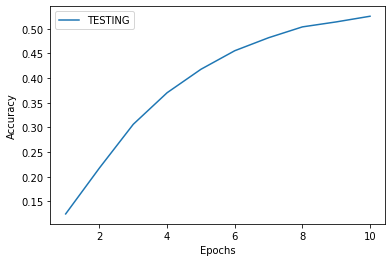

In [ ]:
plt.plot([i for i in range(1,11)],scores2,label='TESTING')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print('saving model...')
my_model5.save('content/model4_use_tokenizer4_v2')
print('saved')

saving model...
INFO:tensorflow:Assets written to: content/model4_use_tokenizer4_v2/assets
saved


In [ ]:
!zip -r /content/model4_use_tokenizer4_v2.zip /content/content/model4_use_tokenizer4_v2


  adding: content/content/model4_use_tokenizer4_v2/ (stored 0%)
  adding: content/content/model4_use_tokenizer4_v2/saved_model.pb (deflated 90%)
  adding: content/content/model4_use_tokenizer4_v2/assets/ (stored 0%)
  adding: content/content/model4_use_tokenizer4_v2/variables/ (stored 0%)
  adding: content/content/model4_use_tokenizer4_v2/variables/variables.index (deflated 71%)
  adding: content/content/model4_use_tokenizer4_v2/variables/variables.data-00000-of-00001 (deflated 8%)


In [ ]:
!cp '/content/model4_use_tokenizer4_v2.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo done


done
